In [48]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader
import sklearn
import sklearn.linear_model
import sklearn.model_selection

In [49]:
df_appl = pandas_datareader.data.DataReader('AAPL', 'yahoo', '2020-01-01')
df_fb = pandas_datareader.data.DataReader('FB', 'yahoo', '2020-01-01')
df_gold = pandas_datareader.data.DataReader('GLD', 'yahoo', '2020-01-01')

df_appl.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-24,162.850006,152.000000,152.580002,162.740005,141147500.0,162.740005
2022-02-25,165.119995,160.869995,163.839996,164.850006,91881700.0,164.850006


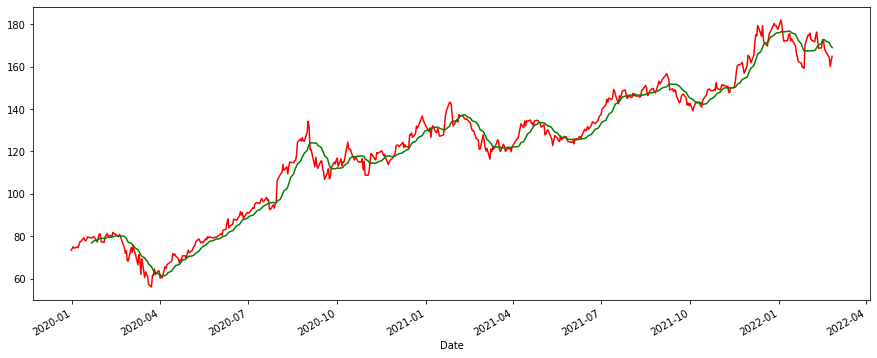

In [50]:
df_appl['SMA'] = df_appl['Close'].rolling(window=14).mean()
df_appl['Close'].plot(figsize=(15,6), color="red")
df_appl['SMA'].plot(figsize=(15,6), color="green")
plt.show()

In [51]:
df_appl['change'] = ((df_appl['Close'] - df_appl['Open']) / (df_appl['Open']) * 100)
df_fb['change'] = ((df_fb['Close'] - df_fb['Open']) / (df_fb['Open']) * 100)
df_gold['change'] = ((df_gold['Close'] - df_gold['Open']) / (df_gold['Open']) * 100)
df_appl.tail(2).round(2)

,High,Low,Open,Close,Volume,Adj Close,SMA,change
Date,,,,,,,,
2022-02-24,162.85,152.00,152.58,162.74,141147500.0,162.74,169.53,6.66
2022-02-25,165.12,160.87,163.84,164.85,91881700.0,164.85,168.99,0.62


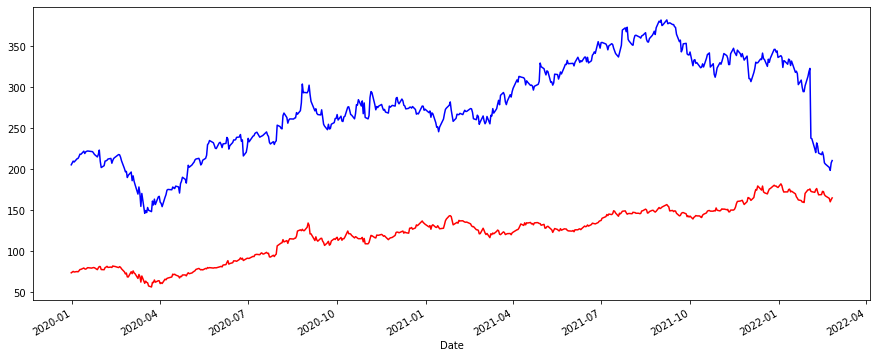

In [52]:
df_appl['Close'].plot(figsize=(15,6), color="red")
df_fb['Close'].plot(figsize=(15,6), color="blue")
plt.show()

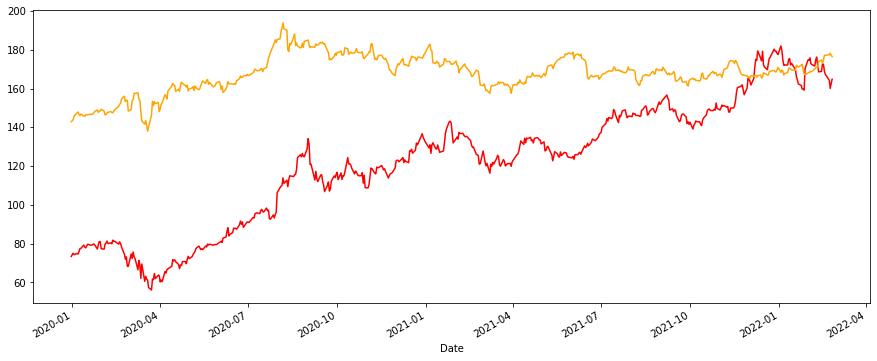

In [53]:
df_appl['Close'].plot(figsize=(15,6), color="red")
df_gold['Close'].plot(figsize=(15,6), color="orange")
plt.show()

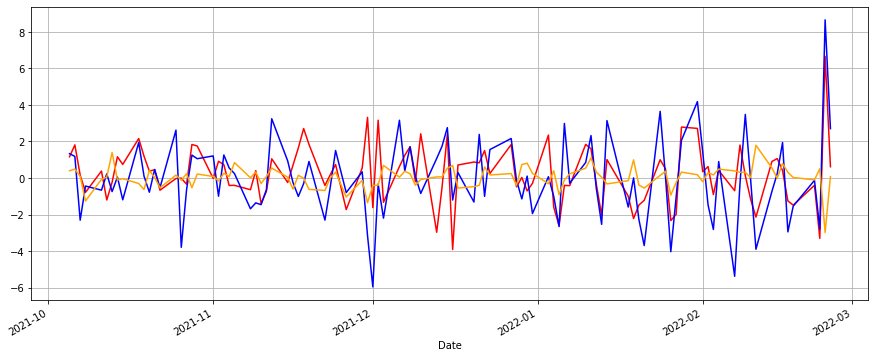

In [54]:
df_appl['change'].tail(100).plot(grid=True, figsize=(15,6), color="red")
df_fb['change'].tail(100).plot(grid=True, figsize=(15,6), color="blue")
df_gold['change'].tail(100).plot(grid=True, figsize=(15,6), color="orange")
plt.show()

In [55]:
# 機械学習
df_appl['label'] = df_appl['Close'].shift(-30)
df_appl.tail(40)

,High,Low,Open,Close,Volume,Adj Close,SMA,change,label
Date,,,,,,,,,
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251,176.005714,-0.707642,168.639999
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055,175.871429,-0.291981,168.880005
2022-01-03,182.880005,177.710007,177.830002,182.009995,104487900.0,181.778397,176.319286,2.350555,172.789993
2022-01-04,182.940002,179.119995,182.630005,179.699997,99310400.0,179.471344,176.702857,-1.604341,172.550003
2022-01-05,180.169998,174.639999,179.610001,174.919998,94537600.0,174.697418,176.389999,-2.611215,168.880005
2022-01-06,175.300003,171.639999,172.699997,172.000000,96904000.0,171.781143,176.371428,-0.405325,167.300003
2022-01-07,174.139999,171.029999,172.889999,172.169998,86580100.0,171.950928,176.445000,-0.416450,164.320007
2022-01-10,172.500000,168.169998,169.080002,172.190002,106765600.0,171.970901,176.619286,1.839366,160.070007
2022-01-11,175.179993,170.820007,172.320007,175.080002,76138300.0,174.857224,176.768571,1.601668,162.740005


In [56]:
# from sklearn.linear_model import LinearRegression

X = np.array(df_appl.drop(['label', 'SMA'], axis=1))
X = sklearn.preprocessing.scale(X)

predict_data = X[-30:]
X = X[:-30]
y = np.array(df_appl['label'])
y = y[:-30]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
accuracy

0.8872473783085134

In [57]:
# 予測
predicted_data = model.predict(predict_data)
predicted_data

array([178.85067152, 178.58111287, 176.29015218, 174.95369446,
       175.44419284, 171.41108572, 165.85466594, 170.24562582,
       169.47222963, 169.13480234, 172.1641612 , 178.92142915,
       177.71382452, 178.6767275 , 179.19243964, 184.41306586,
       183.63069281, 186.35173431, 185.53779893, 184.12154136,
       181.45532913, 180.93295516, 184.12719732, 184.05498872,
       182.35612732, 180.484259  , 178.09529781, 176.8320276 ,
       177.56340914, 176.48170395])

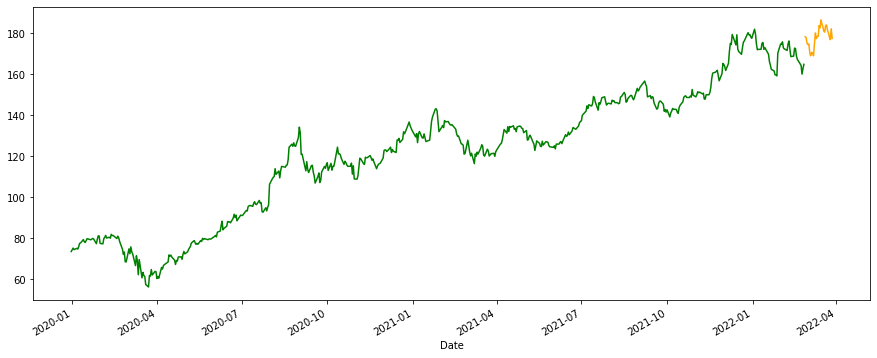

In [44]:
df_appl['Predict'] = np.nan

last_date = df_appl.iloc[-1].name

one_day = 86400
next_unix = last_date.timestamp() + one_day

for data in predicted_data:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_appl.loc[next_date] = np.append([np.nan] * (len(df_appl.columns) -1), data)
    
df_appl['Close'].plot(figsize=(15,6), color="green")
df_appl['Predict'].plot(figsize=(15,6), color="orange")
plt.show()